In [2]:
import random
import os
from Bio import SeqIO
from Bio.SeqUtils import gc_fraction
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
import matplotlib.pyplot as plt


In [4]:
# Load pre-saved Dog and Wolf genome files
dog_genome_path = '../data/dog_genome.fna'
wolf_genome_path = '../data/wolf_genome.fna'

with open(dog_genome_path, 'r') as handle:
    dog_records = list(SeqIO.parse(handle, 'fasta'))

with open(wolf_genome_path, 'r') as handle:
    wolf_records = list(SeqIO.parse(handle, 'fasta'))

print(f"Loaded {len(dog_records)} Dog sequences.")
print(f"Loaded {len(wolf_records)} Wolf sequences.")


Loaded 147 Dog sequences.
Loaded 82 Wolf sequences.


In [8]:
# Parameters for simulation

num_fragments = 1000         # Number of fragments to create
fragment_min = 30            # Minimum length of ancient DNA
fragment_max = 100           # Maximum length
damage_rate = 0.05           # 5% damage per base

In [9]:
ancient_dog_fragments = []

for i in range(num_fragments):
    record = random.choice(dog_records)
    seq_len = len(record.seq)

    if seq_len < fragment_min:
        continue  # skip sequences too short

    # DNA Fragmentation: Randomly selects a fragment of DNA within specified length bounds, mimicking the natural degradation of DNA over time, leading to shorter fragments.
    frag_length = random.randint(fragment_min, fragment_max)
    start = random.randint(0, seq_len - frag_length)
    fragment_seq = record.seq[start:start + frag_length]

    # Base Damage Simulation: Introduces random mutations at a specified damage rate (e.g., 5%), representing chemical modifications such as cytosine deamination, which is common in ancient DNA.
    # Simulate 5% base damage (random mutations)
    damaged_seq = ''.join([
        base if random.random() > damage_rate else random.choice('ACGT')
        for base in fragment_seq
    ])

    frag_record = SeqRecord(
        seq=Seq(damaged_seq),
        id=f"ancient_dog_frag_{i}",
        description=f"From {record.id}, pos {start}-{start + frag_length}"
    )

    ancient_dog_fragments.append(frag_record)

print(f"Simulated {len(ancient_dog_fragments)} ancient Dog fragments.")


Simulated 1000 ancient Dog fragments.


In [10]:
ancient_wolf_fragments = []

for i in range(num_fragments):
    record = random.choice(wolf_records)
    seq_len = len(record.seq)

    if seq_len < fragment_min:
        continue  # skip sequences too short

    frag_length = random.randint(fragment_min, fragment_max)
    start = random.randint(0, seq_len - frag_length)
    fragment_seq = record.seq[start:start + frag_length]

    # Simulate 5% base damage (random mutations)
    damaged_seq = ''.join([
        base if random.random() > damage_rate else random.choice('ACGT')
        for base in fragment_seq
    ])

    frag_record = SeqRecord(
        seq=Seq(damaged_seq),
        id=f"ancient_wolf_frag_{i}",
        description=f"From {record.id}, pos {start}-{start + frag_length}"
    )

    ancient_wolf_fragments.append(frag_record)

print(f"Simulated {len(ancient_wolf_fragments)} ancient Wolf fragments.")


Simulated 1000 ancient Wolf fragments.


In [11]:
# Ensure ancient_dna folder exists
if not os.path.exists('../ancient_dna'):
    os.makedirs('../ancient_dna')

# Save Dog Fragments
dog_fragments_path = '../ancient_dna/ancient_dog_fragments.fasta'
SeqIO.write(ancient_dog_fragments, dog_fragments_path, 'fasta')
print(f"Saved {len(ancient_dog_fragments)} Dog fragments to {dog_fragments_path}")

# Save Wolf Fragments
wolf_fragments_path = '../ancient_dna/ancient_wolf_fragments.fasta'
SeqIO.write(ancient_wolf_fragments, wolf_fragments_path, 'fasta')
print(f"Saved {len(ancient_wolf_fragments)} Wolf fragments to {wolf_fragments_path}")


Saved 1000 Dog fragments to ../ancient_dna/ancient_dog_fragments.fasta
Saved 1000 Wolf fragments to ../ancient_dna/ancient_wolf_fragments.fasta


In [12]:
# Calculate lengths
dog_lengths = [len(record.seq) for record in ancient_dog_fragments]
wolf_lengths = [len(record.seq) for record in ancient_wolf_fragments]

print(f"Dog fragment length range: {min(dog_lengths)} - {max(dog_lengths)}")
print(f"Wolf fragment length range: {min(wolf_lengths)} - {max(wolf_lengths)}")


Dog fragment length range: 30 - 100
Wolf fragment length range: 30 - 100


In [13]:
# Calculate GC content (%)
dog_gc = [gc_fraction(record.seq) * 100 for record in ancient_dog_fragments]
wolf_gc = [gc_fraction(record.seq) * 100 for record in ancient_wolf_fragments]

print(f"Dog GC content range: {min(dog_gc):.2f}% - {max(dog_gc):.2f}%")
print(f"Wolf GC content range: {min(wolf_gc):.2f}% - {max(wolf_gc):.2f}%")

Dog GC content range: 0.00% - 100.00%
Wolf GC content range: 4.04% - 88.57%


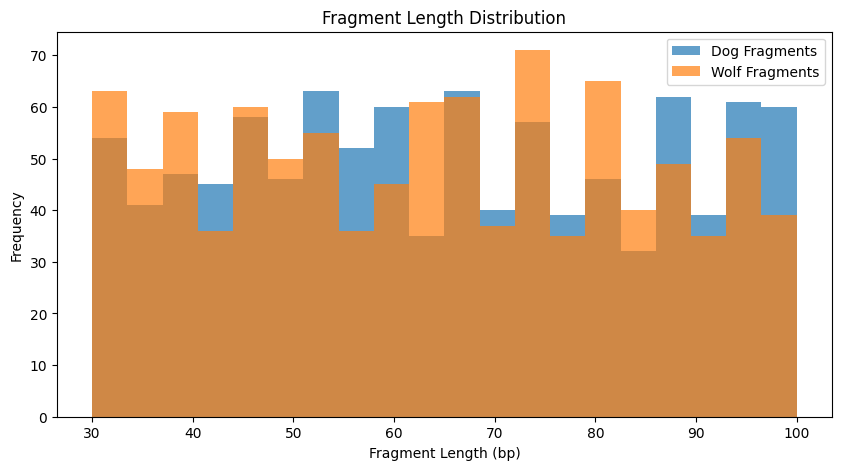

In [20]:
plt.figure(figsize=(10, 5))
plt.hist(dog_lengths, bins=20, alpha=0.7, label='Dog Fragments')
plt.hist(wolf_lengths, bins=20, alpha=0.7, label='Wolf Fragments')
plt.title('Fragment Length Distribution')
plt.xlabel('Fragment Length (bp)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


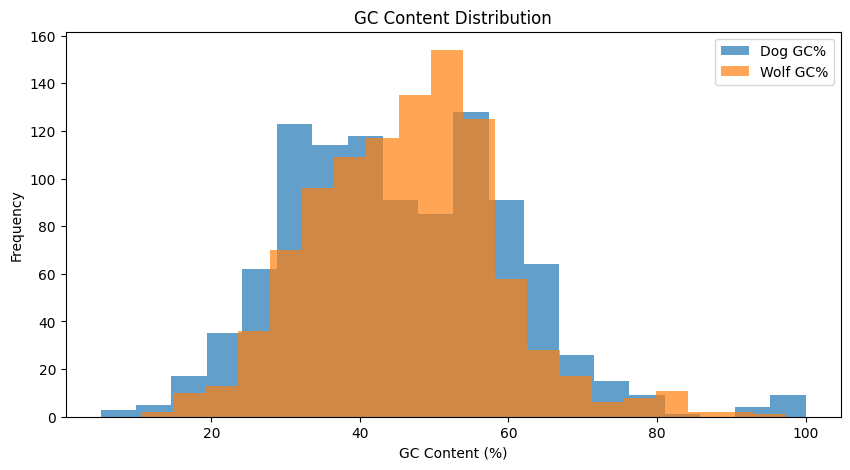

In [21]:
plt.figure(figsize=(10, 5))
plt.hist(dog_gc, bins=20, alpha=0.7, label='Dog GC%')
plt.hist(wolf_gc, bins=20, alpha=0.7, label='Wolf GC%')
plt.title('GC Content Distribution')
plt.xlabel('GC Content (%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


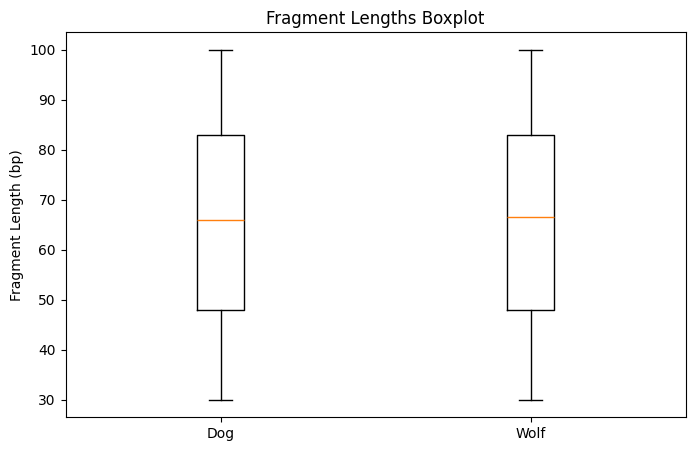

In [23]:
#Boxplot: Fragment Lengths
plt.figure(figsize=(8, 5))
plt.boxplot([dog_lengths, wolf_lengths], tick_labels=['Dog', 'Wolf'])
plt.title('Fragment Lengths Boxplot')
plt.ylabel('Fragment Length (bp)')
plt.show()


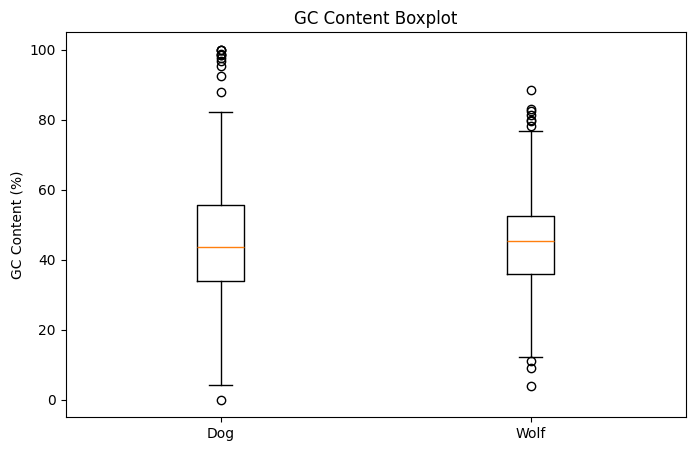

In [22]:
# Boxplot: GC Content
plt.figure(figsize=(8, 5))
plt.boxplot([dog_gc, wolf_gc], tick_labels=['Dog', 'Wolf'])
plt.title('GC Content Boxplot')
plt.ylabel('GC Content (%)')
plt.show()


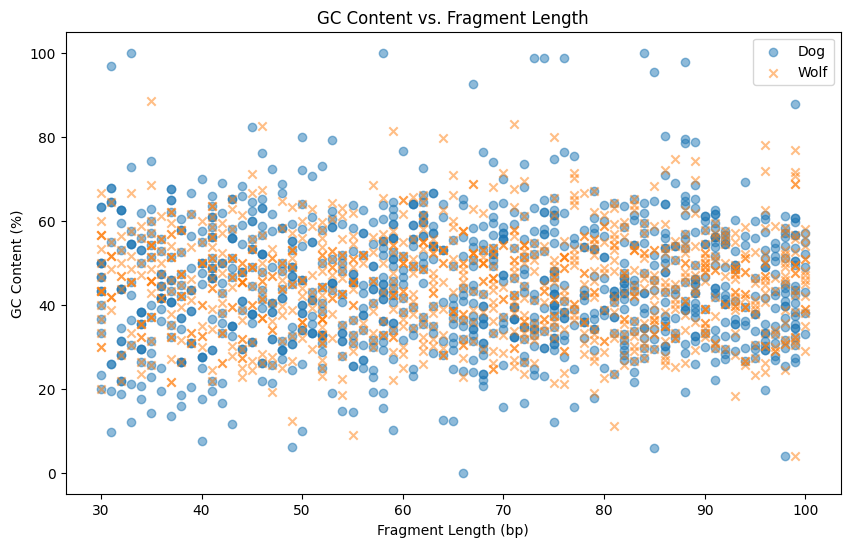

In [ ]:
#Scatter Plot: GC Content vs. Fragment Length
plt.figure(figsize=(10, 6))
plt.scatter(dog_lengths, dog_gc, alpha=0.5, label='Dog', marker='o')
plt.scatter(wolf_lengths, wolf_gc, alpha=0.5, label='Wolf', marker='x')
plt.title('GC Content vs. Fragment Length')
plt.xlabel('Fragment Length (bp)')
plt.ylabel('GC Content (%)')
plt.legend()
plt.show()


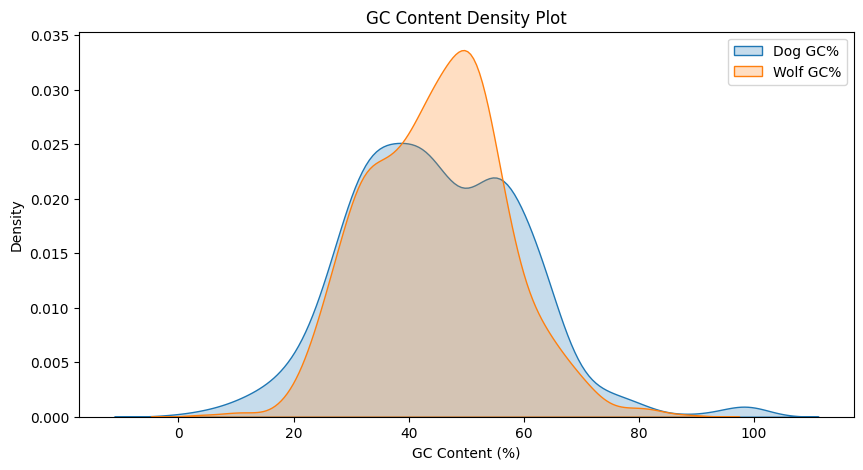

In [18]:
#  Density Plot 

import seaborn as sns

plt.figure(figsize=(10, 5))
sns.kdeplot(dog_gc, fill=True, label='Dog GC%')
sns.kdeplot(wolf_gc, fill=True, label='Wolf GC%')
plt.title('GC Content Density Plot')
plt.xlabel('GC Content (%)')
plt.ylabel('Density')
plt.legend()
plt.show()


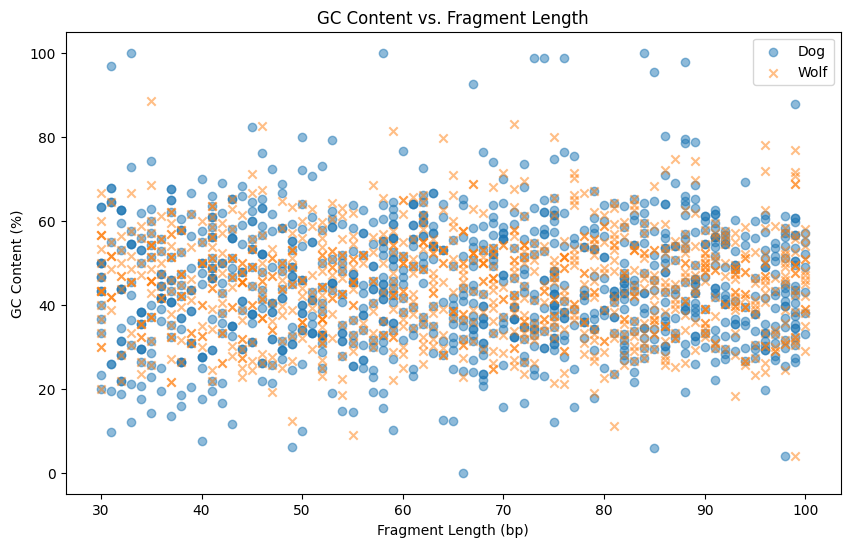

In [ ]:
#Compare Fragment Size Impact on GC Content

plt.figure(figsize=(10, 6))
plt.scatter(dog_lengths, dog_gc, alpha=0.5, label='Dog', marker='o')
plt.scatter(wolf_lengths, wolf_gc, alpha=0.5, label='Wolf', marker='x')
plt.title('GC Content vs. Fragment Length')
plt.xlabel('Fragment Length (bp)')
plt.ylabel('GC Content (%)')
plt.legend()
plt.show()


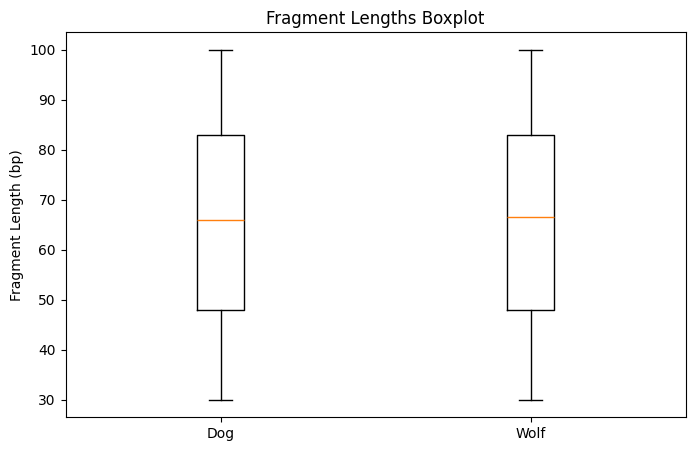

In [21]:
# Show Range of Degradation Across Your Samples Visually
plt.figure(figsize=(8, 5))
plt.boxplot([dog_lengths, wolf_lengths], tick_labels=['Dog', 'Wolf'])
plt.title('Fragment Lengths Boxplot')
plt.ylabel('Fragment Length (bp)')
plt.show()
